# **Import dataset**

In [246]:
from google.colab import files

In [247]:
uploaded = files.upload()

Saving dataset_falcon9.csv to dataset_falcon9 (3).csv


In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pickle

# **Read the data**

In [249]:
df=pd.read_csv('dataset_falcon9.csv')

# **Understanding the data**

In [250]:
df

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1060,-80.603956,28.608058,1
86,87,2020-10-06,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857,1


In [251]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In this section, we will check the raw data and get an understanding of what kind of data we are dealing with.

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

In [253]:
df['FlightNumber']

,FlightNumber
0,1
1,2
2,3
3,4
4,5
...,...
85,86
86,87
87,88
88,89


In [254]:
df['FlightNumber'].head()

,FlightNumber
0,1
1,2
2,3
3,4
4,5


Read column in DataFrame

In [255]:
df[['FlightNumber','LaunchSite']].head(10)

,FlightNumber,LaunchSite
0,1,CCAFS SLC 40
1,2,CCAFS SLC 40
2,3,CCAFS SLC 40
3,4,VAFB SLC 4E
4,5,CCAFS SLC 40
5,6,CCAFS SLC 40
6,7,CCAFS SLC 40
7,8,CCAFS SLC 40
8,9,CCAFS SLC 40
9,10,CCAFS SLC 40


In [256]:
df.drop('Outcome', axis=1)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15400.000000,VLEO,KSC LC 39A,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1060,-80.603956,28.608058,1
86,87,2020-10-06,Falcon 9,15400.000000,VLEO,KSC LC 39A,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15400.000000,VLEO,KSC LC 39A,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857,1


Add new column in Data frame

In [257]:
df['new']=df['FlightNumber']

In [258]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class', 'new'],
      dtype='object')

In [259]:
df.shape

(90, 19)

In [260]:
df.drop('new', axis=1, inplace=True)

In [261]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

In [262]:
df.shape

(90, 18)

In [263]:
df['BoosterVersion']

,BoosterVersion
0,Falcon 9
1,Falcon 9
2,Falcon 9
3,Falcon 9
4,Falcon 9
...,...
85,Falcon 9
86,Falcon 9
87,Falcon 9
88,Falcon 9


In [264]:
set(df['BoosterVersion']) # it gives all unique members

{'Falcon 9'}

In [265]:
df['PayloadMass'].describe()

,PayloadMass
count,90.000000
mean,6104.959412
std,4694.671720
min,350.000000
25%,2510.750000
50%,4701.500000
75%,8912.750000
max,15600.000000


In [266]:
df.describe()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude,Class
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,6104.959412,1.788889,3.500000,1.655556,-86.366477,29.449963,0.666667
std,26.124701,4694.671720,1.213172,1.595288,1.710254,14.149518,2.141306,0.474045
min,1.000000,350.000000,1.000000,1.000000,0.000000,-120.610829,28.561857,0.000000
25%,23.250000,2510.750000,1.000000,2.000000,0.000000,-80.603956,28.561857,0.000000
50%,45.500000,4701.500000,1.000000,4.000000,1.000000,-80.577366,28.561857,1.000000
75%,67.750000,8912.750000,2.000000,5.000000,3.000000,-80.577366,28.608058,1.000000
max,90.000000,15600.000000,6.000000,5.000000,5.000000,-80.577366,34.632093,1.000000


# **Exploratory Data Analysis (EDA)**

<Axes: >

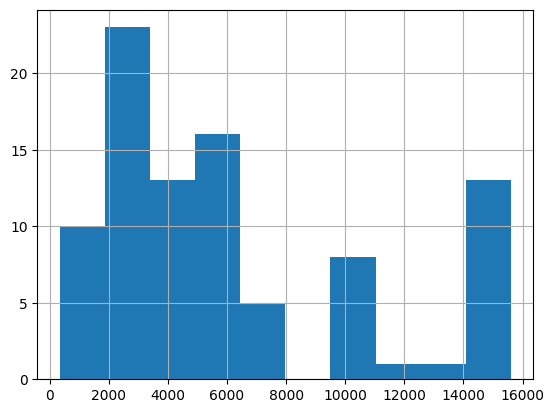

In [267]:
df['PayloadMass'].hist()

array([[<Axes: title={'center': 'FlightNumber'}>,
        <Axes: title={'center': 'PayloadMass'}>,
        <Axes: title={'center': 'Flights'}>],
       [<Axes: title={'center': 'Block'}>,
        <Axes: title={'center': 'ReusedCount'}>,
        <Axes: title={'center': 'Longitude'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Class'}>, <Axes: >]], dtype=object)

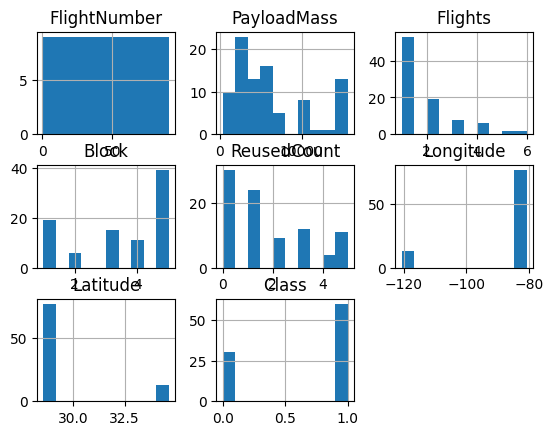

In [268]:
df.hist()

<Axes: >

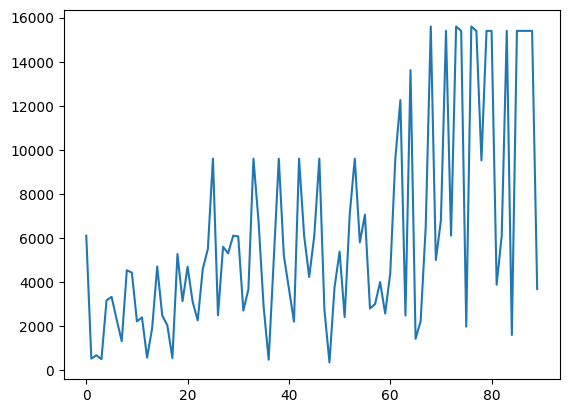

In [269]:
df['PayloadMass'].plot()

In [270]:
df['Orbit']

,Orbit
0,LEO
1,LEO
2,ISS
3,PO
4,GTO
...,...
85,VLEO
86,VLEO
87,VLEO
88,VLEO


In [271]:
set(df['Orbit'])

{'ES-L1', 'GEO', 'GTO', 'HEO', 'ISS', 'LEO', 'MEO', 'PO', 'SO', 'SSO', 'VLEO'}

In [272]:
len(set(df['Orbit']))

11

In [273]:
df['Orbit'].value_counts()

,count
Orbit,
GTO,27
ISS,21
VLEO,14
PO,9
LEO,7
SSO,5
MEO,3
ES-L1,1
HEO,1


<Axes: >

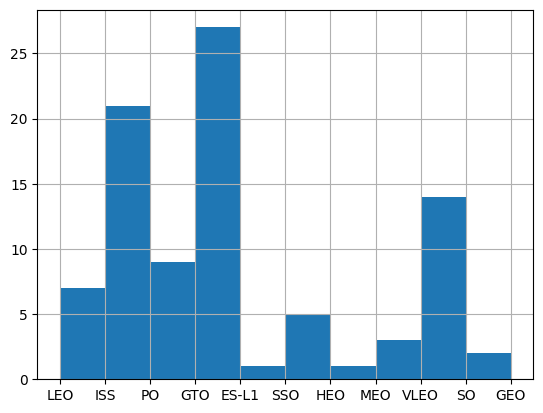

In [274]:
df['Orbit'].hist()

In [275]:
df['LaunchSite'].value_counts()

,count
LaunchSite,
CCAFS SLC 40,55
KSC LC 39A,22
VAFB SLC 4E,13


In [276]:
df['Outcome'].value_counts()

,count
Outcome,
True ASDS,41
None None,19
True RTLS,14
False ASDS,6
True Ocean,5
False Ocean,2
None ASDS,2
False RTLS,1


In [277]:
df['LandingPad'].value_counts()

,count
LandingPad,
5e9e3032383ecb6bb234e7ca,35
5e9e3032383ecb267a34e7c7,13
5e9e3033383ecbb9e534e7cc,12
5e9e3032383ecb761634e7cb,2
5e9e3032383ecb554034e7c9,2


In [278]:
df['Block'].value_counts()

,count
Block,
5.0,39
1.0,19
3.0,15
4.0,11
2.0,6


In [279]:
df['ReusedCount'].value_counts()

,count
ReusedCount,
0,30
1,24
3,12
5,11
2,9
4,4


In [280]:
df['LaunchSite'].value_counts()

,count
LaunchSite,
CCAFS SLC 40,55
KSC LC 39A,22
VAFB SLC 4E,13


In [281]:
# df=df.drop(['BoosterVersion','Serial','Longitude','Latitude'],axis=1)

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

# **Visualization of Data**

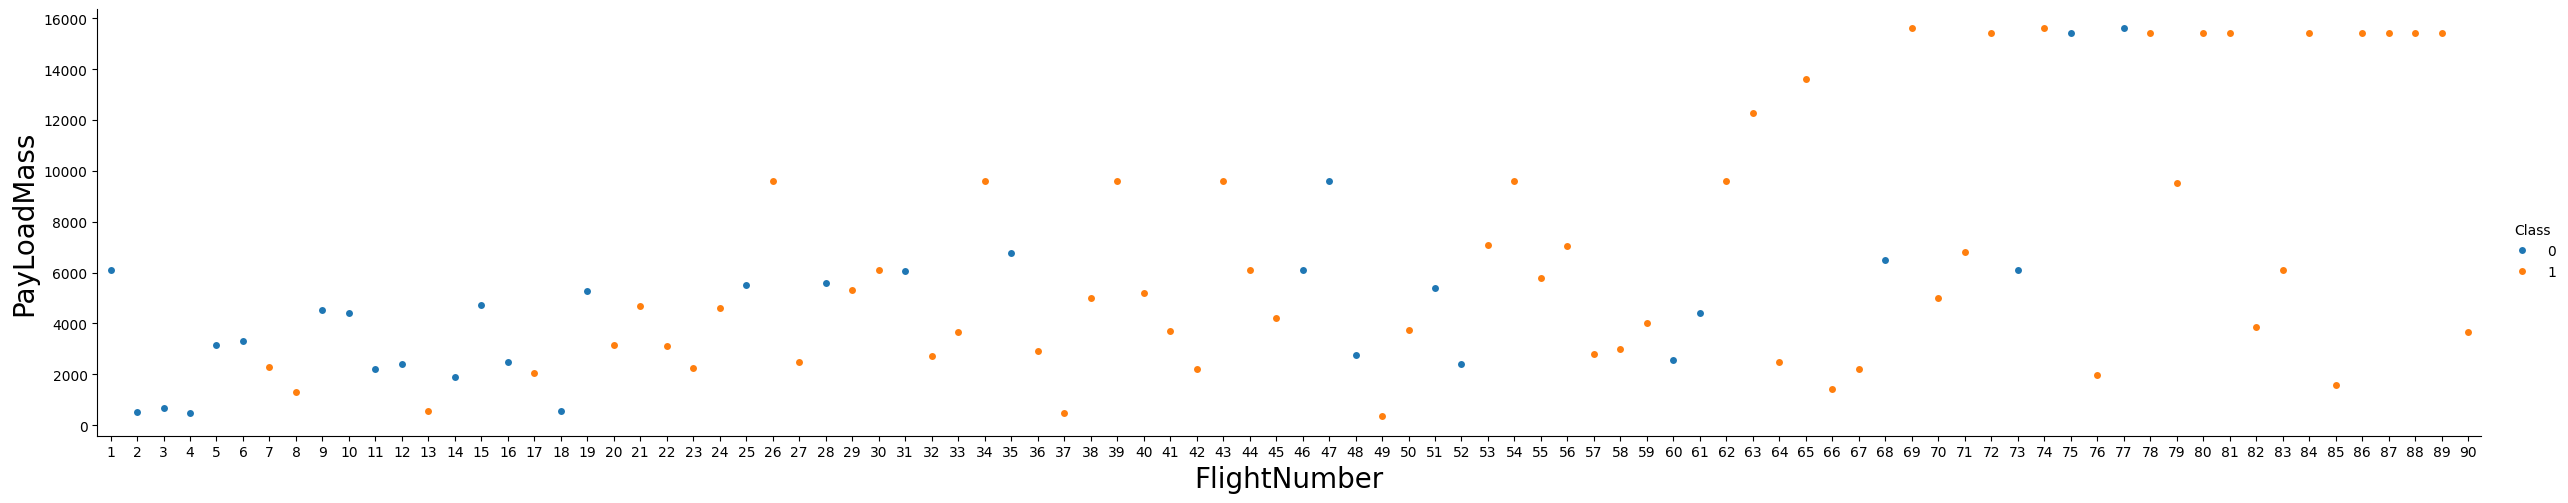

In [283]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel('FlightNumber',fontsize=20)
plt.ylabel('PayLoadMass',fontsize=20)
plt.show()

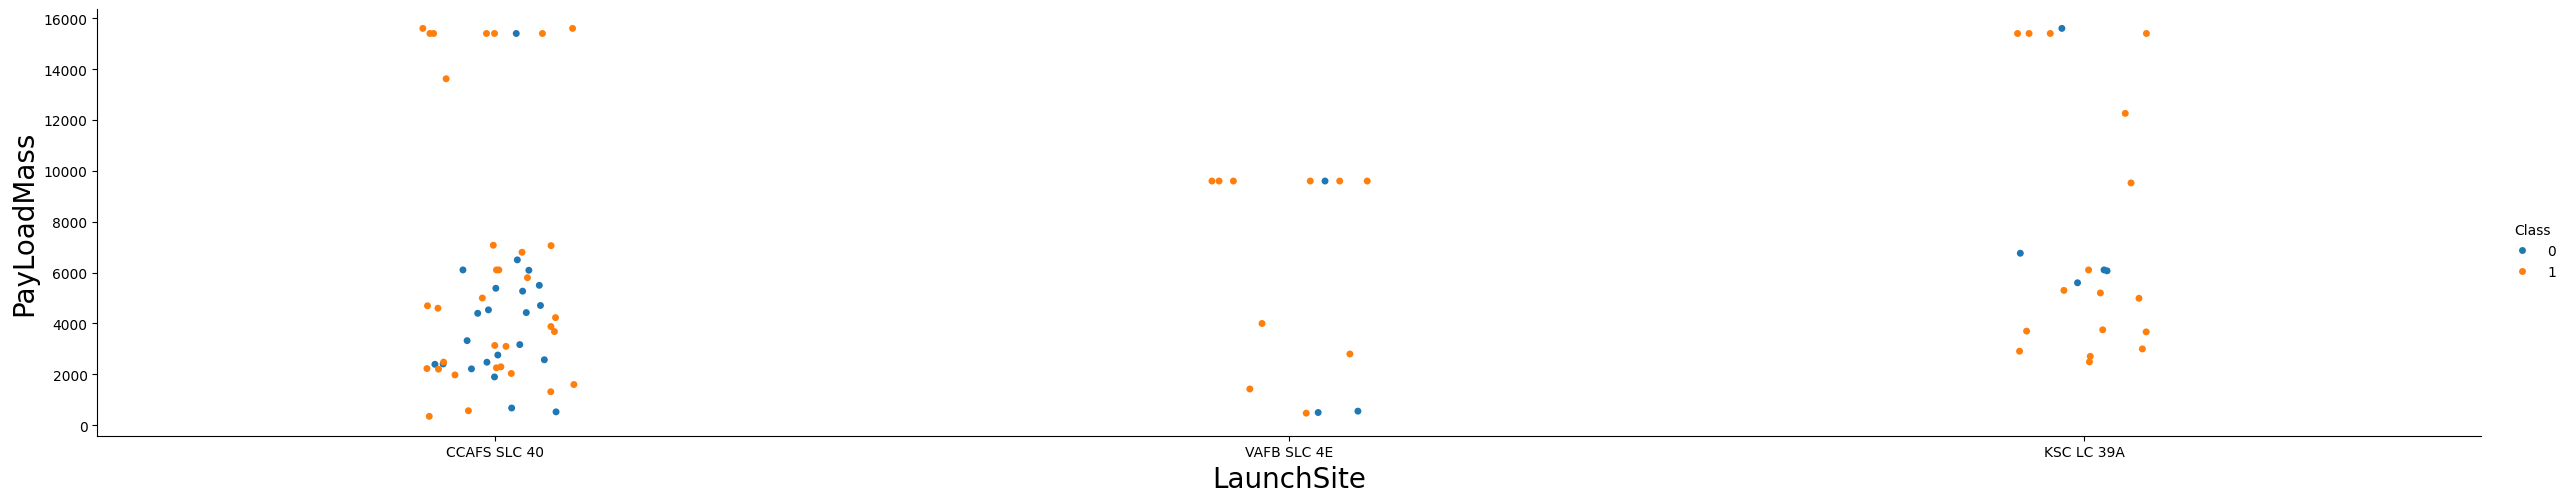

In [284]:
sns.catplot(y="PayloadMass", x="LaunchSite", hue="Class", data=df, aspect = 5)
plt.xlabel('LaunchSite',fontsize=20)
plt.ylabel('PayLoadMass',fontsize=20)
plt.show()

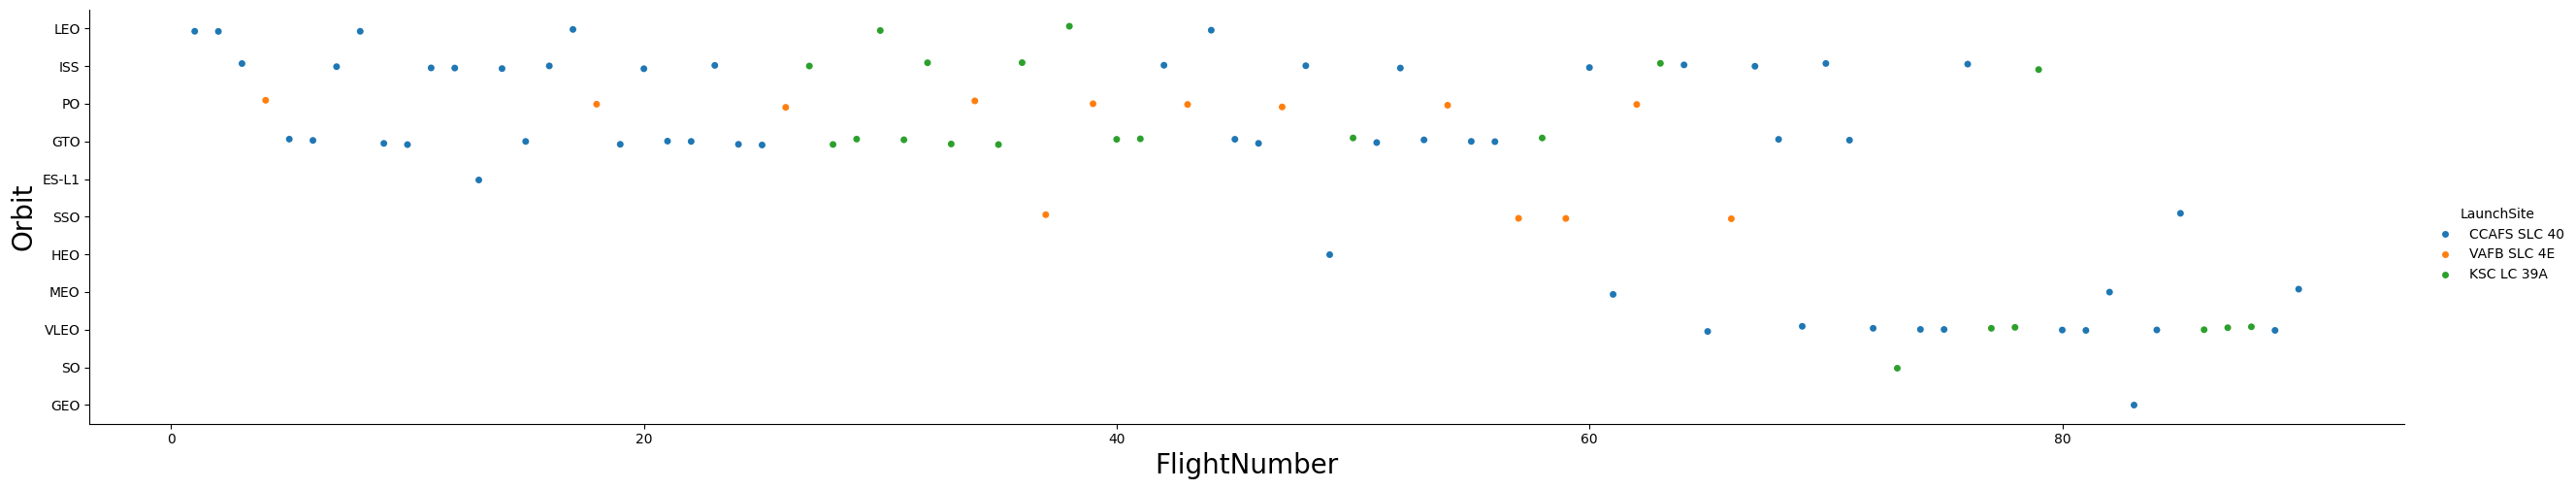

In [285]:
sns.catplot(y="Orbit", x="FlightNumber", hue="LaunchSite", data=df, aspect = 5)
plt.xlabel('FlightNumber',fontsize=20)
plt.ylabel('Orbit',fontsize=20)
plt.show()

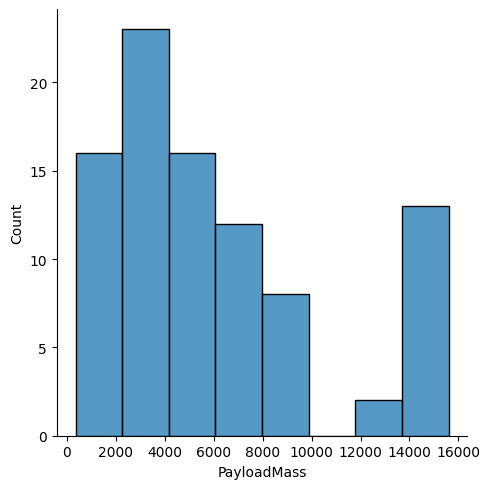

In [286]:
sns.displot(df['PayloadMass'])

<Axes: xlabel='LaunchSite', ylabel='count'>

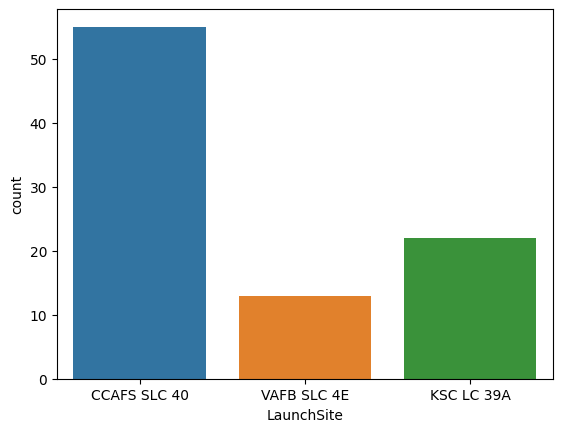

In [287]:
sns.countplot(x='LaunchSite', data=df,hue="LaunchSite")

How to deal with the missing data? replace by mean or by frequncy, here we continue our work with set of data that alittle changed by ourself to be ready for exercise.

here we just want to find only those landing pad which has ca orbital

In [345]:
dummy_1=pd.get_dummies(df['LandingPad'])
dummy_1

,5e9e3032383ecb267a34e7c7,5e9e3032383ecb554034e7c9,5e9e3032383ecb6bb234e7ca,5e9e3032383ecb761634e7cb,5e9e3033383ecbb9e534e7cc
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
85,False,False,True,False,False
86,False,False,True,False,False
87,False,False,True,False,False
88,False,False,False,False,True


In [346]:
dummy_2=pd.get_dummies(df['LaunchSite'])
dummy_2

,CCAFS SLC 40,KSC LC 39A,VAFB SLC 4E
0,True,False,False
1,True,False,False
2,True,False,False
3,False,False,True
4,True,False,False
...,...,...,...
85,False,True,False
86,False,True,False
87,False,True,False
88,True,False,False


In [347]:
dummy_3=pd.get_dummies(df['Orbit'])
dummy_3

,ES-L1,GEO,GTO,HEO,ISS,LEO,MEO,PO,SO,SSO,VLEO
0,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
85,False,False,False,False,False,False,False,False,False,False,True
86,False,False,False,False,False,False,False,False,False,False,True
87,False,False,False,False,False,False,False,False,False,False,True
88,False,False,False,False,False,False,False,False,False,False,True


In [352]:
df_dummy

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Outcome_None ASDS,Outcome_None None,Outcome_True ASDS,Outcome_True Ocean,Outcome_True RTLS,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc
0,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
86,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
87,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
88,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True


In [355]:
df_dummy

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Outcome_None ASDS,Outcome_None None,Outcome_True ASDS,Outcome_True Ocean,Outcome_True RTLS,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc
0,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
86,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
87,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
88,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True


replace df with df_dummy

In [356]:
df['GridFins']= df['GridFins'].astype(int)
df['Legs']= df['Legs'].astype(int)
df['Reused']= df['Reused'].astype(int)

In [357]:
df=pd.concat([df,df_dummy],axis=1)

In [325]:
df=df.drop(['Date'],axis=1)

In [360]:
df

,FlightNumber,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,...,Outcome_None ASDS,Outcome_None None,Outcome_True ASDS,Outcome_True Ocean,Outcome_True RTLS,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc
0,1,6104.959412,LEO,CCAFS SLC 40,None None,1,0,0,0,NaN,...,False,True,False,False,False,False,False,False,False,False
1,2,525.000000,LEO,CCAFS SLC 40,None None,1,0,0,0,NaN,...,False,True,False,False,False,False,False,False,False,False
2,3,677.000000,ISS,CCAFS SLC 40,None None,1,0,0,0,NaN,...,False,True,False,False,False,False,False,False,False,False
3,4,500.000000,PO,VAFB SLC 4E,False Ocean,1,0,0,0,NaN,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,GTO,CCAFS SLC 40,None None,1,0,0,0,NaN,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,15400.000000,VLEO,KSC LC 39A,True ASDS,2,1,1,1,5e9e3032383ecb6bb234e7ca,...,False,False,True,False,False,False,False,True,False,False
86,87,15400.000000,VLEO,KSC LC 39A,True ASDS,3,1,1,1,5e9e3032383ecb6bb234e7ca,...,False,False,True,False,False,False,False,True,False,False
87,88,15400.000000,VLEO,KSC LC 39A,True ASDS,6,1,1,1,5e9e3032383ecb6bb234e7ca,...,False,False,True,False,False,False,False,True,False,False
88,89,15400.000000,VLEO,CCAFS SLC 40,True ASDS,3,1,1,1,5e9e3033383ecbb9e534e7cc,...,False,False,True,False,False,False,False,False,False,True


In [361]:
df=df.drop(['LaunchSite','Orbit','Outcome','LandingPad'],axis=1)

In [362]:
df

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Longitude,Latitude,...,Outcome_None ASDS,Outcome_None None,Outcome_True ASDS,Outcome_True Ocean,Outcome_True RTLS,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc
0,1,6104.959412,1,0,0,0,1.0,0,-80.577366,28.561857,...,False,True,False,False,False,False,False,False,False,False
1,2,525.000000,1,0,0,0,1.0,0,-80.577366,28.561857,...,False,True,False,False,False,False,False,False,False,False
2,3,677.000000,1,0,0,0,1.0,0,-80.577366,28.561857,...,False,True,False,False,False,False,False,False,False,False
3,4,500.000000,1,0,0,0,1.0,0,-120.610829,34.632093,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,0,0,0,1.0,0,-80.577366,28.561857,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,15400.000000,2,1,1,1,5.0,2,-80.603956,28.608058,...,False,False,True,False,False,False,False,True,False,False
86,87,15400.000000,3,1,1,1,5.0,2,-80.603956,28.608058,...,False,False,True,False,False,False,False,True,False,False
87,88,15400.000000,6,1,1,1,5.0,5,-80.603956,28.608058,...,False,False,True,False,False,False,False,True,False,False
88,89,15400.000000,3,1,1,1,5.0,2,-80.577366,28.561857,...,False,False,True,False,False,False,False,False,False,True


In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Columns: 252 entries, FlightNumber to LandingPad_5e9e3033383ecbb9e534e7cc
dtypes: bool(241), float64(4), int64(7)
memory usage: 29.0 KB


In [364]:
df.isnull().sum()

,0
FlightNumber,0
PayloadMass,0
Flights,0
GridFins,0
Reused,0
...,...
LandingPad_5e9e3032383ecb267a34e7c7,0
LandingPad_5e9e3032383ecb554034e7c9,0
LandingPad_5e9e3032383ecb6bb234e7ca,0
LandingPad_5e9e3032383ecb761634e7cb,0


In [365]:
x=df.drop('Class',axis=1)
y=df['Class']

In [366]:
from sklearn.model_selection import train_test_split

In [367]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=101)

In [368]:
from sklearn.linear_model import LogisticRegression

In [369]:
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [372]:
predictions=logmodel.predict(x_test)

In [373]:
predictions

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1])

In [374]:
y_test

,Class
50,0
6,1
51,0
54,1
53,1
69,1
32,1
31,1
21,1
88,1


In [375]:
from sklearn.metrics import confusion_matrix

In [376]:
confusion_matrix(y_test,predictions)

array([[ 6,  1],
       [ 0, 11]])

In [380]:
from sklearn.metrics import accuracy_score

In [381]:
accuracy_score(y_test,predictions, normalize=False)

17.0

In [382]:
accuracy_score(y_test,predictions, normalize=True)

0.9444444444444444

In [377]:
from sklearn.metrics import classification_report

In [383]:
print (classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.92      1.00      0.96        11

    accuracy                           0.94        18
   macro avg       0.96      0.93      0.94        18
weighted avg       0.95      0.94      0.94        18

